In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [37]:
features = pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name=0).to_numpy()
labels   = pd.read_excel('LSVT_voice_rehabilitation.xlsx', sheet_name=1).to_numpy().ravel()

print(features.shape)

(126, 310)


In [38]:
#normalization
features = (features-features.mean(axis=0))/features.std(axis=0)

In [39]:
#F1-measure & accuracy implementation
def F1(label, pred):
    classes = np.unique(label)
    corrects = (label==pred).sum()
    length = label.shape[0]
    accuracy = corrects/length
    F1=0
    for c in classes:
        tp = ((label==pred)[pred==c]).sum()
        fp = ((label!=pred)[pred==c]).sum()
        fn = ((label!=pred)[pred!=c]).sum()
        F1 += 2*tp/(2*tp+fp+fn)
    F1 = F1/classes.shape[0]
    
    return accuracy , F1


#K-fold implementation
def test(**kw):
    accuracy_avg = 0
    f1_avg = 0
    for i in range(0,10):
        step = int(features.shape[0]/10)
        x_train_fold = np.delete(features, np.s_[step*i:step*(i+1)],0)
        y_train_fold = np.delete(labels, np.s_[step*i:step*(i+1)],0)
        x_test_fold = features[step*i:step*(i+1)]
        y_test_fold = labels[step*i:step*(i+1)]
        svc = SVC(**kw).fit(x_train_fold, y_train_fold)
        predictions = svc.predict(x_test_fold)
        acc,f1 = F1(y_test_fold,predictions)
        accuracy_avg += acc
        f1_avg += f1
    return accuracy_avg/10,f1_avg/10



In [40]:
#linear kernel
accuracy_avg,f1_avg = test(kernel='linear')
print(f"Performance of linear kernel: \nAccuracy: {accuracy_avg:.2f}, F1: {f1_avg:.2f}")

Performance of linear kernel: 
Accuracy: 0.81, F1: 0.78


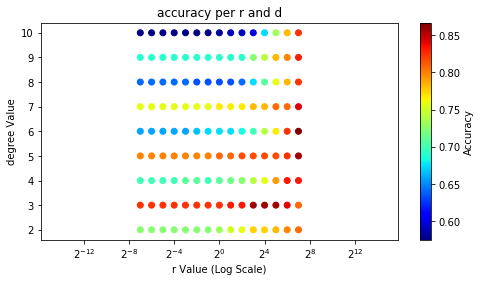

Performance of polynomial kernel: 
Accuracy: 0.87, F1: 0.84


In [41]:
#polynomial kernel
r_values = np.geomspace(2**-7, 2**7, num=15)
d_values = np.arange(2,11)
accs_poly = np.zeros((r_values.shape[0], d_values.shape[0]))
f1s_poly = np.zeros((r_values.shape[0], d_values.shape[0]))
for i, r in enumerate(r_values):
    for j, d in enumerate(d_values):
        acc_folded_poly, f1_folded_poly = test(kernel='poly', C=1, gamma=1, coef0=r, degree=d)
        accs_poly[i,j] = acc_folded_poly.mean()
        f1s_poly[i,j]  = f1_folded_poly.mean()

R, D = np.meshgrid(r_values, d_values)
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xscale('log', basex=2)
scat = ax.scatter(R, D, c=accs_poly.T, cmap='jet')
cb = plt.colorbar(scat, spacing='proportional')
cb.set_label('Accuracy')
ax.set_xlabel('r Value (Log Scale)')
ax.set_ylabel('degree Value')
ax.set_title('accuracy per r and d')
plt.show()

accuracy_avg =np.amax(accs_poly)
f1_avg = np.amax(f1s_poly)
print(f"Performance of polynomial kernel: \nAccuracy: {accuracy_avg:.2f}, F1: {f1_avg:.2f}")

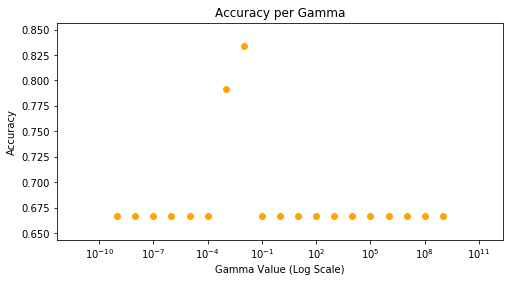

Performance of RBF kernel: 
Accuracy: 0.83, F1: 0.75


In [47]:
#RBF kernel
gamma_values = np.geomspace(1e-9, 1e9, num=19)
accs_rbf = np.zeros(gamma_values.shape)
f1s_rbf = np.zeros(gamma_values.shape)
for i, gamma in enumerate(gamma_values):
    acc_folded_rbf, f1_folded_rbf = test( kernel='rbf', C=1, gamma=gamma)
    accs_rbf[i] = acc_folded_rbf.mean()
    f1s_rbf[i]  = f1_folded_rbf.mean()
    
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xscale('log', basex=10)
ax.scatter(gamma_values, accs_rbf, color='orange')
ax.set_xlabel('Gamma Value (Log Scale)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Gamma')
plt.show()

accuracy_avg =np.amax(accs_rbf)
f1_avg = np.amax(f1s_rbf)
print(f"Performance of RBF kernel: \nAccuracy: {accuracy_avg:.2f}, F1: {f1_avg:.2f}")

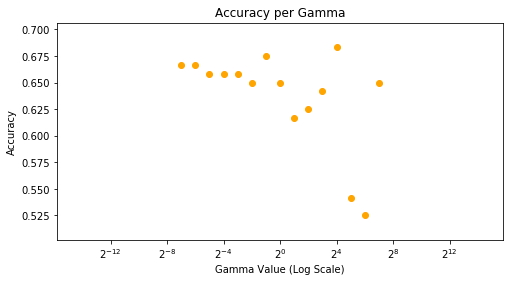

Performance of sigmoid kernel: 
Accuracy: 0.68, F1: 0.63


In [46]:
#sigmoid kernel
r_values = np.geomspace(2**-7, 2**7, num=15)
accs_sigmoid = np.zeros(r_values.shape)
f1s_sigmoid = np.zeros(r_values.shape)
for i, r in enumerate(r_values):
    acc_folded_sigmoid, f1_folded_sigmoid = test(kernel='sigmoid', C=1, gamma=1, coef0=r)
    accs_sigmoid[i] = acc_folded_sigmoid.mean()
    f1s_sigmoid[i]  = f1_folded_sigmoid.mean()
    
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xscale('log', basex=2)
ax.scatter(r_values, accs_sigmoid, color='orange')
ax.set_xlabel('Gamma Value (Log Scale)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Gamma')
plt.show()

accuracy_avg =np.amax(accs_sigmoid)
f1_avg = np.amax(f1s_sigmoid)
print(f"Performance of sigmoid kernel: \nAccuracy: {accuracy_avg:.2f}, F1: {f1_avg:.2f}")